<a href="https://colab.research.google.com/github/Misudhari/Deep-Learning-Lab/blob/main/CNN_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam_v2

# from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [52]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/MNIST Dataset/Fashion MNIST/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/MNIST Dataset/Fashion MNIST/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train_data = np.array(df_train,dtype = 'float32')
test_data = np.array(df_test, dtype = 'float32')

x_train = train_data[:,1:] / 255
y_train = train_data[:,0]

x_test = test_data[:,1:] / 255
y_test = test_data[:,0]

In [55]:
# x_train , x_validate, y_train, y_validate = train_test_split(
#     x_train, y_train, test_size=0.2, random_state = 12345
# )

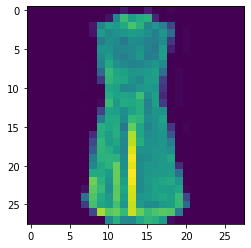

In [56]:
import random
i = random.randint(1,60000)
image = x_train[i, :].reshape((28,28))
plt.imshow(image)
plt.show()

#Create CNN


* Define Model
* Compile the model
* Fit the model





In [57]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
# x_validate = x_test.reshape(x_test.shape[0], *im_shape)

print("x_train Shape: {}".format(x_train.shape))
print("x_test Shape: {}".format(x_test.shape))
# print("x_validate Shape: {}".format(x_validate.shape))

x_train Shape: (60000, 28, 28, 1)
x_test Shape: (10000, 28, 28, 1)


In [58]:
cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size=3, activation = 'relu', input_shape = im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [59]:
cnn_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = adam_v2.Adam(lr=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [60]:
cnn_model.fit(
    x_train, y_train, batch_size = batch_size,
    epochs = 10, verbose=1
    # validation_data = (x_validate, y_validate)
)

Epoch 1/10
118/118 [==============================] - 26s 213ms/step - loss: 0.6989 - accuracy: 0.7712
Epoch 2/10
118/118 [==============================] - 23s 195ms/step - loss: 0.4151 - accuracy: 0.8547
Epoch 3/10
118/118 [==============================] - 23s 194ms/step - loss: 0.3703 - accuracy: 0.8717
Epoch 4/10
118/118 [==============================] - 23s 195ms/step - loss: 0.3411 - accuracy: 0.8810
Epoch 5/10
118/118 [==============================] - 23s 195ms/step - loss: 0.3247 - accuracy: 0.8864
Epoch 6/10
118/118 [==============================] - 23s 194ms/step - loss: 0.3099 - accuracy: 0.8908
Epoch 7/10
118/118 [==============================] - 23s 194ms/step - loss: 0.2965 - accuracy: 0.8972
Epoch 8/10
118/118 [==============================] - 23s 195ms/step - loss: 0.2855 - accuracy: 0.9006
Epoch 9/10
118/118 [==============================] - 23s 195ms/step - loss: 0.2804 - accuracy: 0.9002
Epoch 10/10
118/118 [==============================] - 24s 202ms/step - l

In [61]:
score = cnn_model.evaluate(x_train, y_train, verbose=0)

print("test loss: {:.4f}".format(score[0]))
print(" test acc: {:.4f}".format(score[1]))

test loss: 0.2545
 test acc: 0.9117


#References
* Deep Learning with Keras + TensorFlow - (Pt.1) Build the CNN - https://youtu.be/N3oMKS1AfVI
* Deep Learning with Keras + TensorFlow - (Pt.2) Build the CNN - https://youtu.be/lOZGYzTn9Z8